# Multiple price bid matrix example

The model setup is available in the following formats:

- pyshop
    - [multi_price_bid_matrix_model.py](#multi_price_bid_matrix_model.py)

In this example we show how to import a spreadsheet containing multiple prices (up to 52 time series) into a dataframe. This price input will be used to create the same amount of scenarios which we in turn feed to SHOP. The output of this multiple price input run from SHOP will result into a joint bid matrix which consider all the stochastic price inputs to SHOP with all its price data intact, ready to make use of in a marked bidding situation with uncertainty regarding the price forecasts.

## Imports and settings

The first thing we do is to import the needed packages. You can import whichever packages you like, however we use the following ones for this example:

* Pandas for structuring our data into dataframes
* Cufflinks and Plotly for dynamic graph plotting
* Pyshop in order to create a SHOP session

In [1]:
import pandas as pd
import cufflinks as cf
cf.go_offline()
from cufflinks import tools
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from pyshop import ShopSession

Additionally, we import basic SHOP functions and data from a predefined demo dataset, see <a href="https://shop.sintef.energy/documentation/examples/example-data-sets-and-functions/" target="_blank">this</a> section of the documentation:


In [2]:
from multi_price_bid_matrix_model import build_model, run_model

## Instancing SHOP and building the model

In order to have SHOP receive our inputs, run the model we create and give us results, we need to instance a running SHOP session. You may create multiple SHOP sessions simultaneously if needed.

In [3]:
#Create a standard ShopSession
shop = ShopSession()

We then build our model using the existing function imported from bp.py

In [4]:
#Build a simple model with one plant with two equal generators and a second plant with one large and three small generators 
#by calling function "build_model" in bp.py
build_model(shop)

The imported model can now be visualized:

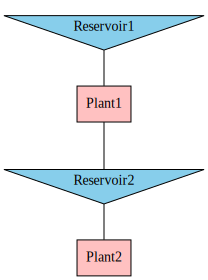

In [5]:
#Display topology to the screen
display(shop.model.build_connection_tree())

## Data preperation

Since we we need to work a bit with time horizons given that we will consider part of a period with stochastic information, we retrive the start time from the imported data

In [6]:
# Retrieve the start time for adding stochastic time series later
timeres=shop.get_time_resolution()
shop.get_time_resolution()

{'starttime': Timestamp('2018-01-23 00:00:00'),
 'endtime': Timestamp('2018-01-26 00:00:00'),
 'timeunit': 'hour',
 'timeresolution': 2018-01-23 00:00:00    1.0
 2018-01-23 01:00:00    1.0
 2018-01-23 02:00:00    1.0
 2018-01-23 03:00:00    1.0
 2018-01-23 04:00:00    1.0
                       ... 
 2018-01-25 20:00:00    1.0
 2018-01-25 21:00:00    1.0
 2018-01-25 22:00:00    1.0
 2018-01-25 23:00:00    1.0
 2018-01-26 00:00:00    1.0
 Name: data, Length: 73, dtype: float64}

### Importing prices from spreadsheet

After the model data has been imported and read, we move on to the prices we want to consider. 
We first define the number of prices we want to import

In [7]:
# Import number of prices
n_prices = 10

which will be equal to the scenarios we will create later on. 
We then define for how long of a period we want to consider the stochastic price input. This can not be a larger period than what you have data for in your price forecasts.

In [8]:
# Set the hours to import stochastic price
stochastic_prices_start = timeres['starttime']
# In this example, we choose 24 hours
stochastic_prices_end = stochastic_prices_start + pd.Timedelta(hours=23)

Next we import the stochastic prices accordingly into a dataframe

In [9]:
# Use pandas read_excel function to import n_prices to a dataframe, starting from the first column to the left in the spreadsheet
stochastic_prices_from_file = pd.read_excel ('52_hourly_prices_random.xls', header=None,usecols=list(range(0,n_prices)))

# Optionally, select which scenarios you want relative to the columns in your spreadsheet. They must then be equal to n_prices;
#stoch_price_from_file = pd.read_excel (r'20200123_scens_edit.xlsx', usecols=[1,2,5,7,9])

stochastic_prices_from_file

,0,1,2,3,4,5,6,7,8,9
0,38.688925,30.841437,39.303183,43.122221,31.399708,38.211738,42.479485,29.838857,29.932279,46.548664
1,38.916484,28.478524,33.843385,36.856333,40.447140,34.473711,33.751629,33.699346,36.987757,38.796374
2,37.133973,29.923425,31.280585,40.117271,33.285538,34.728074,34.096047,32.085033,36.426590,45.003989
3,28.567145,25.738590,33.428984,39.937462,39.570224,31.558648,38.290842,37.527192,28.990410,40.885543
4,32.909629,30.642448,34.668521,47.708656,36.963273,33.749174,38.703468,31.802267,29.553703,46.706921
5,34.438556,34.623470,33.969606,41.136482,35.480291,41.834732,33.788576,28.953164,39.690668,46.564680
6,35.470862,30.479294,35.031910,41.902961,37.544836,33.300794,41.630947,42.224127,40.853218,38.904588
7,43.884363,51.591232,43.362872,48.165823,43.549434,48.468647,53.586396,43.276922,46.691875,51.359444
8,46.485712,49.473627,44.295022,54.174682,47.947510,53.740830,50.935949,54.031818,53.416069,58.500872
9,51.831571,48.735697,56.201060,50.879699,54.291574,54.693474,58.224800,53.485508,64.635484,54.939225


In order to later combine the stochastic prices with a deterministic price into the future, we make sure the dataframe has the correct timestamp indexing

In [10]:
# Add correct indexing to the dataframe
stochastic_prices_from_file.index=pd.date_range(stochastic_prices_start,stochastic_prices_end,freq='H')

Then we can plot and review the newly imported prices

In [11]:
# Plot all stochastic prices imported from Excel
stochastic_prices_from_file.iplot(title="Stochastic prices imported from spreadsheet", xaxis_title="Time", yaxis_title="EUR/MWh")

### Creating scenarios

Now it is time to create scenarios that we can populate with the imported prices. We make sure to create just as many scenarios as we have prices imported.

In [12]:
# Generate as many scenarios as prices
n_scenarios = n_prices
for i in range (1, n_scenarios+1):
    scenario_name='S'+str(i)
    # The first scenario always exists in SHOP and should not be added again
    if i>1:
        scenario = shop.model.scenario.add_object(scenario_name)
    else:
        scenario=shop.model.scenario[scenario_name]
    scenario.scenario_id.set(i)
    
    # Set each scenario equally probable
    scenario.probability.set(1.0/n_scenarios)
    
    # Branch immediately, i.e. at 'starttime'
    scenario.common_scenario.set(pd.Series([i], index=[timeres['starttime']]))
    
    # Optionally set branching to start after given number of hours (all scenarios are set equal to scenario 2 before this) 
    #scen.common_scenario.set(pd.Series([2, i], index=[timeres['starttime'], branching_start_time]))

### Creating the new price array from stochastic and deterministic prices

Since we have chosen to only consider the first 24 hours as stochastic when it comes to the price, but have longer total time horizon, we need to combine the stochastic and deterministic prices into a joint price dataframe. We have already defined the start and end time for the stochastic price, but need to make sure that we also define when the deterministic price should be valid and thus overlap each other.

In [13]:
# Use first (and only) market as index for setting stochastic data and getting results
name_list = shop.model.market.get_object_names()

# The deterministic model only has one market, so we give stochastic price to that (da is just a name we use to indicate that we regard it to be a day ahead energy market)
day_ahead_market = shop.model.market[name_list[0]]

# Get the deterministic price from ASCII import for correct indexing 
deterministic_price = day_ahead_market.sale_price.get()

# Create a new array for deterministic price with n_prices columns in order to combine it with the stochastic price
deterministic_price_multi_dimension_array = pd.DataFrame(index=deterministic_price.index, columns=list(range(0,n_prices)))

# Define when to use deterministic price
deterministic_price_start = timeres['starttime']+pd.Timedelta(hours=24)
deterministic_price_end = timeres['endtime']-pd.Timedelta(hours=1)

We print out the start and end times to make sure they are correct.

In [14]:
# Print out start and end set point for prices
print("Stochastic price(s) start time",stochastic_prices_start)
print("Stochastic price(s) end time",stochastic_prices_end)
print("Deterministic prices start time",deterministic_price_start)
print("Deterministic prices end time",deterministic_price_end)

Stochastic price(s) start time 2018-01-23 00:00:00
Stochastic price(s) end time 2018-01-23 23:00:00
Deterministic prices start time 2018-01-24 00:00:00
Deterministic prices end time 2018-01-25 23:00:00


Lastly, we need to combine the stochastic and deterministic price inputs. We do this by creating a new dataframe with the right dimensions and indexes, and then populate it according to the start and end times defined above.

In [15]:
# Creating a new price dataframe which will combine both stochastic and deterministic price
combined_price = pd.DataFrame(index=deterministic_price.index, columns=list(range(0,n_prices)))

# Loop over the new price array and assign stochastic and deterministic prices

for j in range(0,n_prices):
    deterministic_price_multi_dimension_array[j]=deterministic_price
for i in pd.date_range(stochastic_prices_start,stochastic_prices_end,freq='H'):
       combined_price.loc[i] = stochastic_prices_from_file.loc[i]
for i in pd.date_range(deterministic_price_start,(deterministic_price_end),freq='H'):
        combined_price.loc[i] = deterministic_price_multi_dimension_array.loc[i]


Then we can plot out the resulting combined price.

In [16]:
# Plot the combined price
combined_price.iplot(title="Combined price input", xaxis_title="Time", yaxis_title="EUR/MWh")

This price is then set as the day ahead market price to consider for all scenarios. We also define a slightly higher buy-back price

In [17]:
day_ahead_market.sale_price.set(combined_price)

# Make sure that the buy price is slightly higher, so no arbitrage occurs

day_ahead_market.buy_price.set(day_ahead_market.sale_price.get()+0.1)

### Create bid groups and configure limits

Now we need to create a bid group, which is the connection between a set of hydropower plants and their bid matrix. 

In [18]:
# Create a bid group
bg=shop.model.bid_group.add_object('bg')

# Add all plants in the system to the bid group
for plant in shop.model.plant:
    bg.connect_to(plant)

# Defining which periods the bid curve should consider
day_ahead_market.bid_flag.set(pd.Series([1,0],index=[stochastic_prices_start,stochastic_prices_end]))

## Running multi price scenarios in SHOP

It is time to optimize. We call the predefined function run_model, which calls for five full and three incremental iterations. Since we have defined scenarios in the SHOP instance earlier, all scenarios will be computed and optimized with a single call.

In [19]:
#Optimize model by calling "run_model" bp.py
run_model(shop)

## Creating and plotting the bid matrix

Once SHOP has finished optimizing all scenarios, we can retrive and start processing the bid matrix the way we want it.

In [21]:
# Get bid matrix as an array
bid_result=bg.bid_curves.get()

# Convert bid matrix to a dataframe structure of choice
bid_matrix=pd.DataFrame(index=bid_result[0].index)
for t in range (0, 23):
    bid_matrix[t]=bid_result[t].values

# Transpose the bid matrix if necessary depending on the viewing needs 
bid_matrix_transposed=bid_matrix.transpose()

When we are satisfied with a data structure that fulfill our needs, we can either print it or plot it to review it 

In [22]:
# Plotting bid matrices with different properties
bid_matrix.iplot(kind='heatmap', colorscale='spectral',title="Bid matrix heatmapped (and inverted compared to normal bid matrix)",xaxis_title ="Market price", yaxis_title="Hours")

In [23]:
# Plotting bid matrices with different properties
bid_matrix_transposed.iplot(kind='bar', title="Bid matrix per hour", xaxis_title ="Hour [h]", yaxis_title="Market price")

## Plotting other results

If we want to see how each scenario suggest to produce, we can of course have a look at that as well

In [24]:
# Get the optimal production value(s)
optimal_production=day_ahead_market.sale.get()

In [25]:

# Plot optimal production in different plot types
optimal_production.iplot(kind='bar',title="Bid volumes per stochastic price #", xaxis_title="Time", yaxis_title="Sale/Production [MW]")

In [26]:
# Plot optimal production in different plot types
optimal_production.iplot(kind='bar',barmode='stack', bargap=.1,title="Bid volumes per stochastic price #, stacked", xaxis_title="Time", yaxis_title="Sale/Production [MW]")

# Files

## multi_price_bid_matrix_model.py

In [27]:
%pycat multi_price_bid_matrix_model.py

import pandas as pd

def build_model(shop):
    starttime = pd.Timestamp('2018-01-23 00:00:00')
    endtime = pd.Timestamp('2018-01-26')
    shop.set_time_resolution(starttime=starttime, endtime=endtime, timeunit="hour", timeresolution=pd.Series(index=[starttime],data=[1]))
    
    rsv1 = shop.model.reservoir.add_object('Reservoir1')
    rsv1.max_vol.set(39)
    rsv1.lrl.set(860)
    rsv1.hrl.set(905)
    rsv1.vol_head.set(pd.Series([860, 906, 907], index=[0, 39, 41.66], name=0))    

    rsv2 = shop.model.reservoir.add_object('Reservoir2')
    rsv2.max_vol.set(97.5)   
    rsv2.lrl.set(650)   
    rsv2.hrl.set(679)    
    rsv2.vol_head.set(pd.Series([650, 679, 680], index=[0, 97.5, 104.15], name=0))
    
    plant1 = shop.model.plant.add_object('Plant1')
    plant1.outlet_line.set(672)
    plant1.main_loss.set([0])
    plant1.penstock_loss.set([0.001])
    plant1.mip_flag.set(1)
    for gen_no in range(2):
        gen=shop.model.generator.add_object(f"{plant1.get_name()}_G{str(gen_n